# Steps Undertaken

In [ ]:

# Main aim is to showcase the impact of the Covid-19 on the economy of the Australia.

# so firstly i am starting by taking the data of Covid-19 all over the world.
# furhter i will plot the covid impact on the Australia.
# In the next step i would read the stock market data and plot it too.
# In the last step i would compare the effect of the covid on the economy of the Australia using the stock market data.
# Then i carry out predictions for the next 10 days which had second wave of Covid-19.

In [ ]:
# cleaning the data and removing the uneccessary data

In [1]:
#importing all the packges required
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [3]:
#reading the time series data
df = pd.read_csv("time-Series.csv")
#showing the data
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [5]:
# firstly understanding the dimensionality of the dataframe
df.shape

(266, 108)

In [7]:
# using describe to understand the statstical series of the dataframe.
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,10831.353383,11109.146617,11367.375940,1.164357e+04,1.192589e+04,1.224381e+04,1.257059e+04,1.288475e+04,1.318319e+04,1.347013e+04
std,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,62832.452514,64533.421413,65963.451143,6.750722e+04,6.918850e+04,7.102979e+04,7.311436e+04,7.495796e+04,7.657327e+04,7.801568e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01,8.100000e+01,8.200000e+01,8.225000e+01,8.675000e+01
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02,4.855000e+02,4.995000e+02,5.085000e+02,5.425000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03,2.165750e+03,2.359250e+03,2.515000e+03,2.635750e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06,1.103461e+06,1.132539e+06,1.158040e+06,1.180375e+06


In [9]:
# to know the data types of the every column
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/30/20             int64
5/1/20              int64
5/2/20              int64
5/3/20              int64
5/4/20              int64
Length: 108, dtype: object

In [10]:
# for this analysis the lat and long is not necessary so removing the uneccesary data
df_new = df.loc[:, ~df.columns.isin(['Lat', 'Long'])]
df_new.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,0,0,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,0,0,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [11]:
# taking a count of all the dates
df_new.iloc[:,2:].agg(['sum']).T.reset_index()

,index,sum
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
99,4/30/20,3256853
100,5/1/20,3343777
101,5/2/20,3427343
102,5/3/20,3506729


In [14]:
#Setting the country/region as the index as transfering it to the new dataframe
df_final = df_new.groupby(['Country/Region']).sum().reset_index()
df_final = df_final.set_index('Country/Region').T
df_final.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


# Analysis of Covid-19 impact

In [16]:
# steps Undertaken
# I use stock value as a element to see the impact of covid-19
# The country selected is Australia

In [21]:
Aus_Covid = df_final['Australia']
Aus_Covid.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    4
Name: Australia, dtype: int64

In [22]:
# getting the new increased cases of everday
Aus_Covid = Aus_Covid.diff()

In [23]:
Aus_Covid = Aus_Covid.fillna(1)
Aus_Covid

1/22/20     1.0
1/23/20     0.0
1/24/20     0.0
1/25/20     0.0
1/26/20     4.0
           ... 
4/30/20    14.0
5/1/20     12.0
5/2/20     21.0
5/3/20     23.0
5/4/20     25.0
Name: Australia, Length: 104, dtype: float64

In [24]:
Aus_Covid = Aus_Covid.reset_index()

In [25]:
# I am using here the stock value of Australia
Aus_Stock = pd.read_csv('aus.csv')
Aus_Stock.head()

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,Australia,Stock Market,1/22/2020,29186.27,Daily,INDU,2020-05-04T22:01:05.043
1,Australia,Stock Market,1/23/2020,29160.09,Daily,INDU,2020-05-04T22:01:05.043
2,Australia,Stock Market,1/24/2020,28989.73,Daily,INDU,2020-05-04T22:01:05.043
3,Australia,Stock Market,1/27/2020,28535.80,Daily,INDU,2020-05-04T22:01:05.043
4,Australia,Stock Market,1/28/2020,28722.85,Daily,INDU,2020-05-04T22:01:05.043


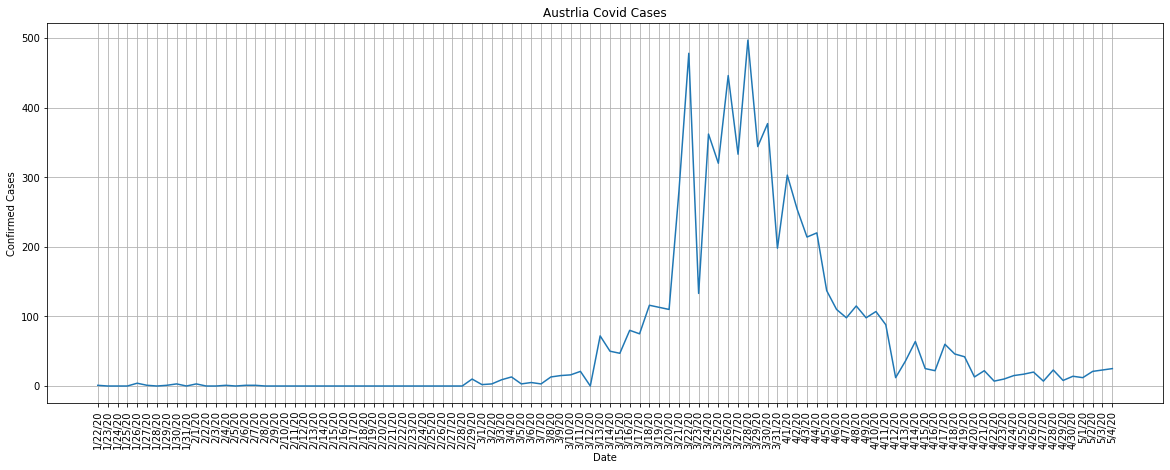

In [27]:
#ploting the trend of Covid Cases 
plt.figure(figsize=(20,7))
plt.plot(Aus_Covid['index'], Aus_Covid['Australia'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.title('Austrlia Covid Cases')
plt.grid()
plt.show()

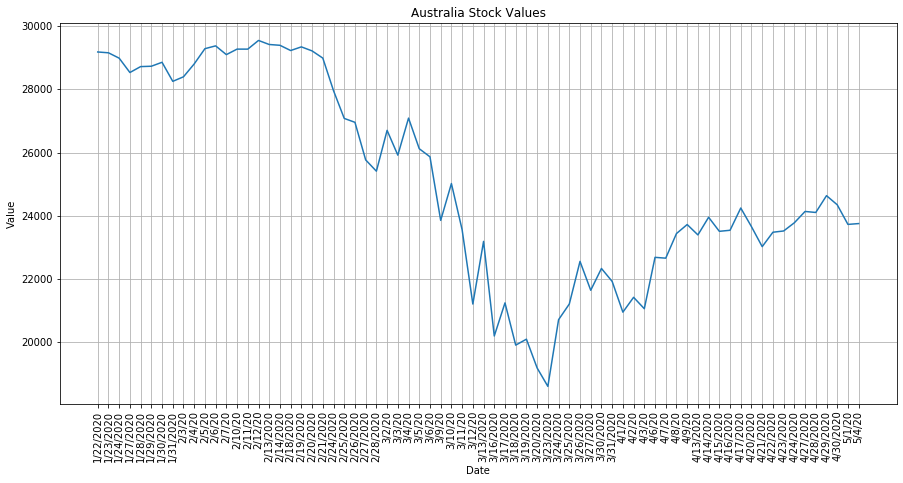

In [28]:
#ploting the trend of Stock Values
plt.figure(figsize=(15,7))
plt.plot(Aus_Stock['DateTime'], Aus_Stock['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title("Australia Stock Values")
plt.grid()
plt.show()

In [29]:
# Now the step is to plot the two trend into one graph
# Setting the same datetime index
Aus_Covid[['index']] = Aus_Covid[['index']].apply(pd.to_datetime)
Aus_Stock[['DateTime']] = Aus_Stock[['DateTime']].apply(pd.to_datetime)

In [30]:
#Getting the new stock value dataframe
Aus_Subset = Aus_Covid.loc[Aus_Covid['index'].isin(Aus_Stock['DateTime'])]
Aus_Subset

,index,Australia
0,2020-01-22,1.0
1,2020-01-23,0.0
2,2020-01-24,0.0
5,2020-01-27,1.0
6,2020-01-28,0.0
...,...,...
97,2020-04-28,23.0
98,2020-04-29,8.0
99,2020-04-30,14.0
100,2020-05-01,12.0


In [31]:
#combing the stock value and covid in one data frame
Aus_Stock['covid']=Aus_Subset['Australia'].to_numpy()
Aus_Stock1= Aus_Stock[['Value','covid']]

In [32]:
# Preprocess data
from sklearn import preprocessing
x = Aus_Stock1.values 
cols=Aus_Stock1.columns

# Drop the outlier
min_max_scaler = preprocessing.MinMaxScaler()

# Standardized data
x_scaled = min_max_scaler.fit_transform(x)
Aus_Stock1 = pd.DataFrame(x_scaled)
Aus_Stock1.columns = cols
Aus_Stock1['DateTime']=Aus_Stock['DateTime']
print(Aus_Stock1)

       Value     covid   DateTime
0   0.966682  0.002242 2020-01-22
1   0.964293  0.000000 2020-01-23
2   0.948749  0.000000 2020-01-24
3   0.907330  0.002242 2020-01-27
4   0.924397  0.000000 2020-01-28
..       ...       ...        ...
67  0.502726  0.051570 2020-04-28
68  0.551297  0.017937 2020-04-29
69  0.525005  0.031390 2020-04-30
70  0.468248  0.026906 2020-05-01
71  0.470627  0.056054 2020-05-04

[72 rows x 3 columns]


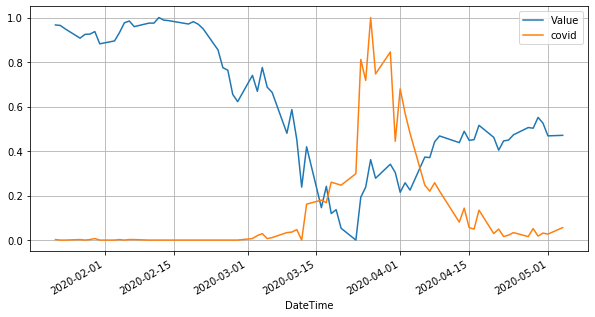

In [33]:
#plotting the data

Aus_Stock1.plot(x='DateTime', y=['Value', 'covid'], figsize=(10,5), grid=True)

# Prediction of the values with 2nd wave of the COVID-19

In [34]:
# Regression Analysis forecast of Stock Index for Austrlia
# Firsly starting by combining all the data
Aus2 = Aus_Stock1[['Value','covid','DateTime']]
Aus2

,Value,covid,DateTime
0,0.966682,0.002242,2020-01-22
1,0.964293,0.000000,2020-01-23
2,0.948749,0.000000,2020-01-24
3,0.907330,0.002242,2020-01-27
4,0.924397,0.000000,2020-01-28
...,...,...,...
67,0.502726,0.051570,2020-04-28
68,0.551297,0.017937,2020-04-29
69,0.525005,0.031390,2020-04-30
70,0.468248,0.026906,2020-05-01


In [35]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Prepare the data return train set and test set
def prepare_data(df,forecast_col, covid_col, covid,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out)
    X = np.array(df[[forecast_col, covid_col]]) if covid  else np.array(df[[forecast_col]]) 
    X = preprocessing.scale(X)
    X_forecast = X[-forecast_out:]
    X = X[:-forecast_out]
    label.dropna(inplace=True)
    y = np.array(label)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=72)

    response = [X_train,X_test , Y_train, Y_test , X_forecast]
    return response;

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
#define x and y and predict 10 days value after 
forecast_col = 'Value'
covid_col='covid'
forecast_out = 10
test_size = 0.2
covid= True

X_train, X_test, Y_train, Y_test , X_forecast= prepare_data(Aus2,forecast_col,covid_col,covid,forecast_out,test_size)

print("Including the COVID cases count")
#OLS to do linerRegression
print("Linear Regression")
learner = linear_model.LinearRegression()
learner.fit(X_train,Y_train)
score=learner.score(X_test,Y_test)
forecast= learner.predict(X_forecast)
#See the accurancy
print(score)
print(forecast)

#Ridge Regression
print("Ridge Regression:")
clf = Ridge(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

#Lasso Regrssion
print("Lasso Regression:")
clf = Lasso(alpha=0.3)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))

score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

#Support Vector regressor
print("Support Vector Regression:")
clf=SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
r2 = r2_score(Y_test, Y_pred) 
print('r2 score is = ' + str(r2))
score=clf.score(X_test,Y_test);
forecast= clf.predict(X_forecast)
print(score)
print(forecast)

Including the COVID cases count
Linear Regression
0.5383176917522453
[0.31627528 0.33710648 0.34242412 0.3653702  0.3848028  0.39557887
 0.42187373 0.40590329 0.35917252 0.37171624]
Ridge Regression:
r2 score is = 0.5397181111754916
0.5397181111754916
[0.31964431 0.34035516 0.34557047 0.3681583  0.38741579 0.39788045
 0.42398215 0.40816164 0.36207468 0.3743149 ]
Lasso Regression:
r2 score is = -0.05530783866590516
-0.05530783866590516
[0.5246891 0.5246891 0.5246891 0.5246891 0.5246891 0.5246891 0.5246891
 0.5246891 0.5246891 0.5246891]
Support Vector Regression:
r2 score is = 0.03227389379286827
0.03227389379286827
[0.38865734 0.30621848 0.31153281 0.30427935 0.25819845 0.30285883
 0.24409771 0.26766128 0.29992381 0.33204456]
